In [1]:
import os
import sys
import numpy as np
import time

import matplotlib.pyplot as plt

In [2]:
# import the frank2d directory
current_dir =  os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)

from frank2d import Frank2D 
from constants import rad_to_arcsec
from plot import Plot

## Upload input

In [3]:
# Huang 2018 
inc = 34.97
pa = 85.76
dra = 1.9e-3
ddec = -2.5e-3
Rout = 1.9 #arcsecs

# UVtable
dir = "../../../data/"
data_file = dir +'AS209_continuum_prom_1chan_30s_keepflagsFalse.txt'

 # load data
u, v, Re, Imag, Weights = np.loadtxt(data_file, unpack = True)
Vis = Re + Imag*1j

## Run Frank2D

In [17]:
N = 150

In [18]:
start_time = time.time()
frank2d = Frank2D(N, Rout)
sol = frank2d.fit_(u, v, Vis, Weights, GP_params = [-2, 68.5, 1e4])
end_time = time.time()
execution_time = end_time - start_time
print(execution_time/60, " min")

Successful CGM:  True
Sure?:  False
545.2544471859932  min


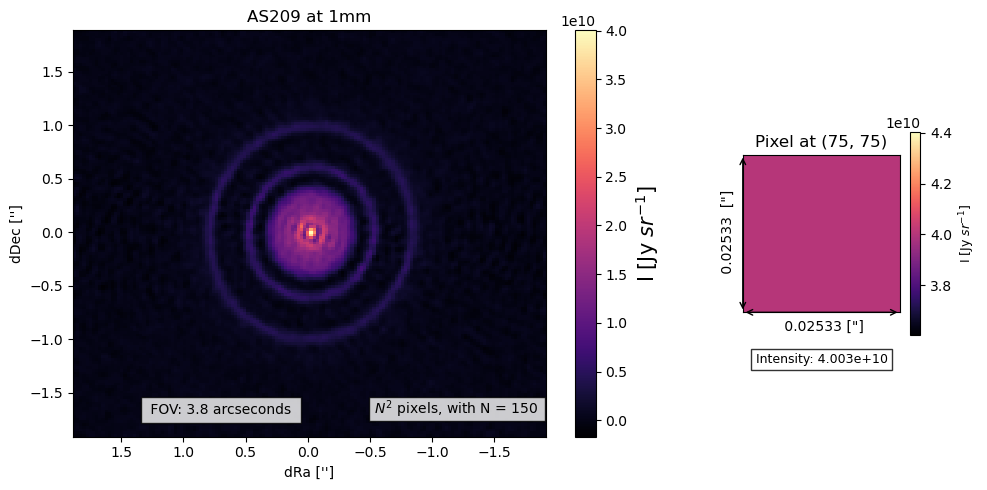

In [19]:
Plot(frank2d).get_image('AS209 at 1mm')

## Simulations

In [268]:
N = 25

In [282]:
n_sim = 9
c = np.random.normal(60, 20, n_sim)
m = -5.4
l = 1e4
#m = np.random.normal(-5, 2, n_sim)
#l = np.random.normal(1e4, 1e1, n_sim)
#c = 68.5

In [274]:
I_sim = []

In [ ]:
for i in range(0, n_sim):
    start_time = time.time()
    print("fit: "+ str(i))
    frank2d = Frank2D(N, Rout)
    sol = frank2d.fit_(u, v, Vis, Weights, GP_params = [m, c[i], l])
    I_sim.append(sol)
    end_time = time.time()
    execution_time = end_time - start_time
    print(execution_time, ' seconds for ' + f' m = {m:.1f}, c = {c[i]:.1f}, l = {l:.1e} ') 

fit: 0
Successful CGM:  True
45.67537498474121  seconds for  m = -5.4, c = 99.6, l = 1.0e+04 
fit: 1
Successful CGM:  True
4.05806303024292  seconds for  m = -5.4, c = 14.9, l = 1.0e+04 
fit: 2
Successful CGM:  True
53.73060607910156  seconds for  m = -5.4, c = 60.5, l = 1.0e+04 
fit: 3
Successful CGM:  True
64.26996302604675  seconds for  m = -5.4, c = 64.0, l = 1.0e+04 
fit: 4
Successful CGM:  True
77.09961175918579  seconds for  m = -5.4, c = 69.3, l = 1.0e+04 
fit: 5
Successful CGM:  True
76.77174592018127  seconds for  m = -5.4, c = 93.3, l = 1.0e+04 
fit: 6
Successful CGM:  True
8.993484020233154  seconds for  m = -5.4, c = 39.0, l = 1.0e+04 
fit: 7
Successful CGM:  True
134.4690282344818  seconds for  m = -5.4, c = 78.4, l = 1.0e+04 
fit: 8


In [276]:
I_sim[0].shape

(50, 50)

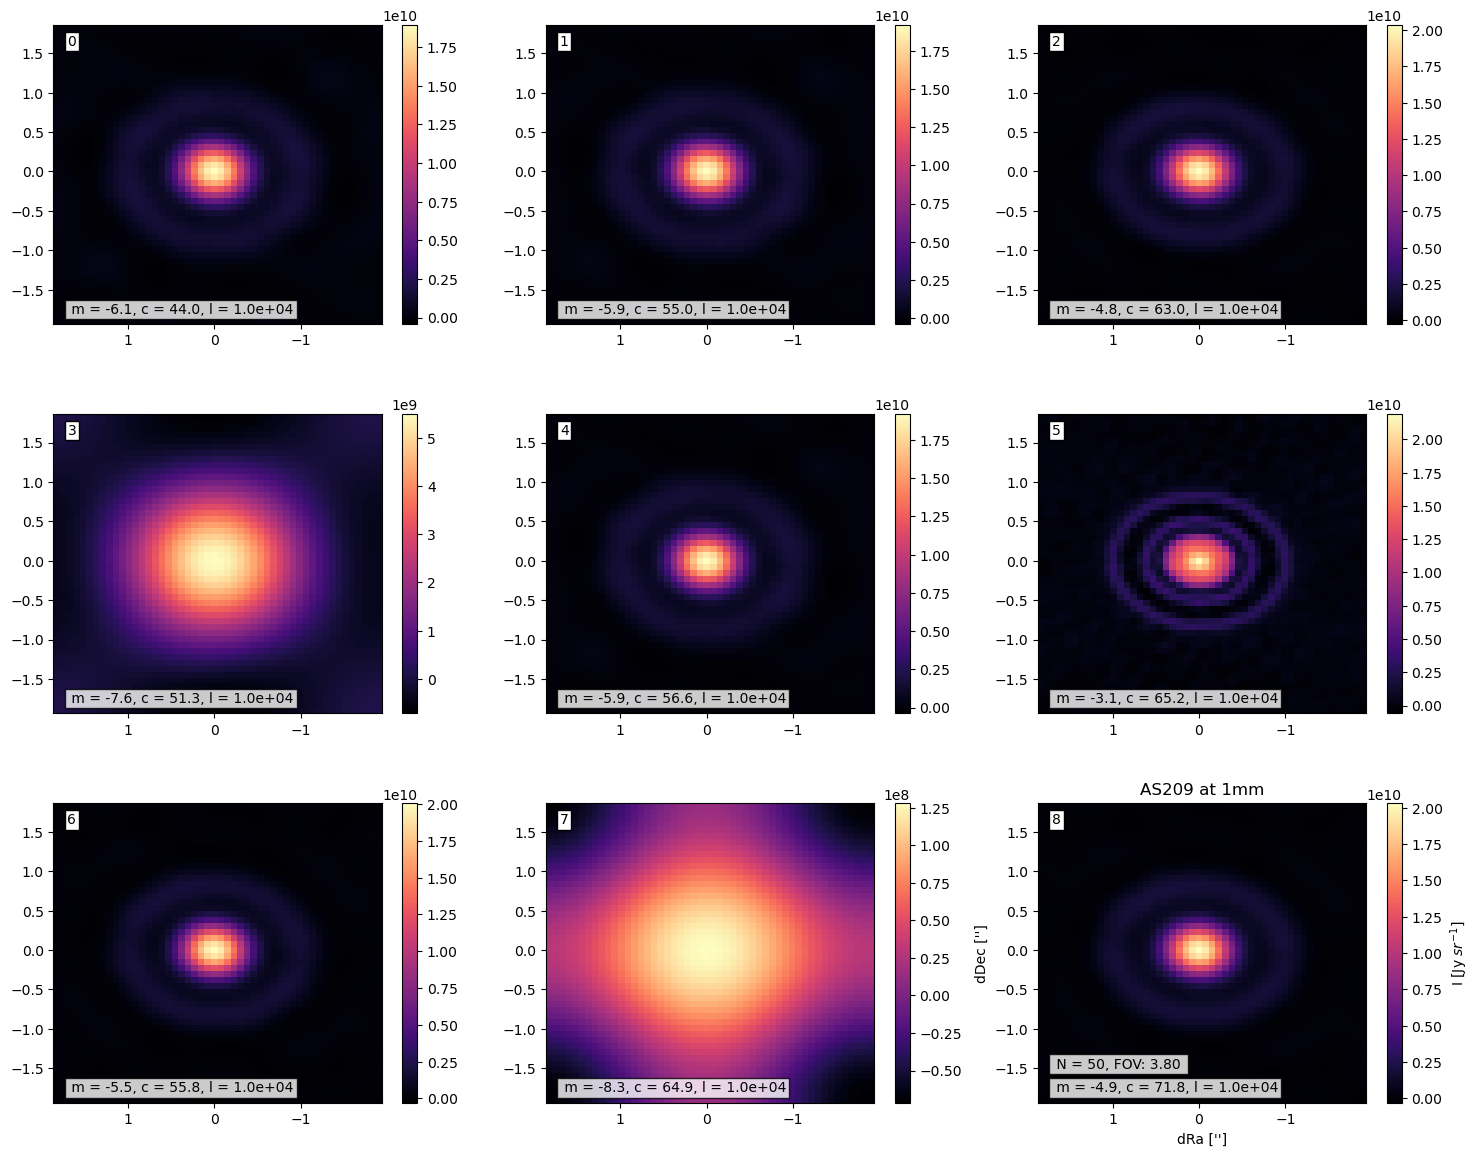

In [278]:
I_reshape = I_sim

n_plots = int(np.sqrt(n_sim))

# Crear una figura con 5x5 subplots
fig, axs = plt.subplots(n_plots, n_plots, figsize=(18, 14))

# Ajustar el espacio entre los subplots para hacerlos más grandes
plt.subplots_adjust(wspace=0.2, hspace=0.3)
x, y = frank2d._FT._x*rad_to_arcsec, frank2d._FT._y*rad_to_arcsec

# Generar cada subplot
k = 0
for i in range(n_plots):
    for j in range(n_plots):
        # Crear el gráfico de intensidad
        I_reshape = I_sim[k].reshape(N, N).T
        plot = axs[i, j].pcolormesh(y, x, I_reshape, cmap='magma')
        
        axs[i, j].invert_xaxis()
        
        cmap = plt.colorbar(plot, ax=axs[i, j])

        if i == j and i == (n_plots-1):
            axs[i, j].set_title(f'AS209 at 1mm')
            axs[i, j].set_xlabel("dRa ['']")
            axs[i, j].set_ylabel("dDec ['']")
            cmap.set_label(r'I [Jy $sr^{-1}$]', size=10)

            axs[i, j].text(1.7, -1.5, f' N = {N}, FOV: {2*Rout:.2f} ', 
                           bbox={'facecolor': 'white', 'pad': 2, 'alpha': 0.8})

        axs[i, j].text(1.7, -1.8, f' m = {m:.1f}, c = {c[k]:.1f}, l = {l:.1e}', 
                       bbox={'facecolor': 'white', 'pad': 2, 'alpha': 0.8})

        axs[i, j].text(1.7, 1.6, f'{k}', bbox={'facecolor': 'white', 'pad': 2, 'alpha': 1})
        
        k += 1

# Mostrar la figura completa
plt.show()

## FFT


In [44]:
Vis_model = frank2d.sol_visibility.reshape(N, N)

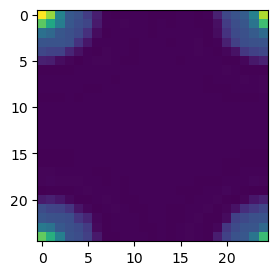

In [47]:
plt.figure(figsize=(3,3))
plt.imshow(Vis_model.real)
plt.show()

In [49]:
I_model = np.fft.fftshift(np.fft.ifft2(Vis_model).real)

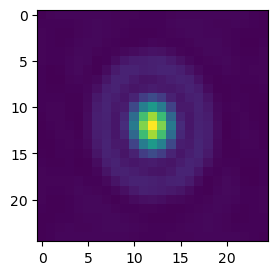

In [53]:
plt.figure(figsize=(3,3))
plt.imshow(I_model)
plt.show()

## Review the axes of the image

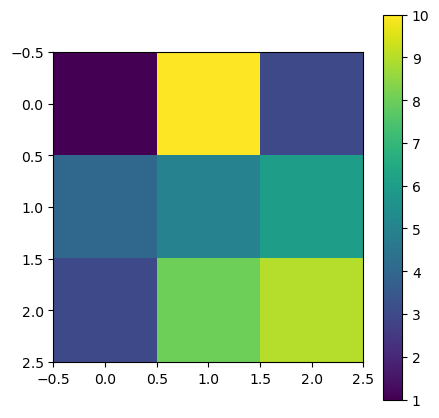

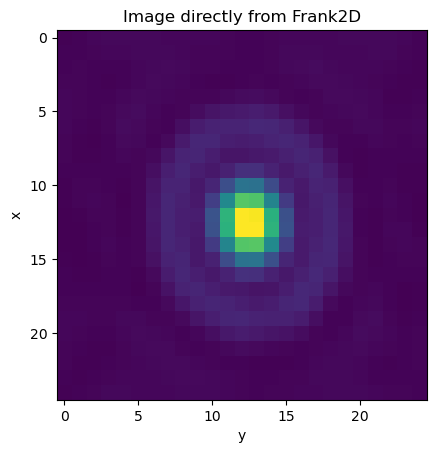

In [25]:
matrix = np.array([[1, 10, 3],
                   [4, 5, 6],
                   [3, 8, 9]])
plt.figure(figsize=(5, 5))
plt.imshow(matrix, cmap='viridis')
plt.colorbar()  # Añadir una barra de color para ver la escala
plt.show()

plt.imshow(sol)
plt.xlabel('y')
plt.ylabel('x')
plt.title('Image directly from Frank2D')
plt.show()

> * The axis from the fourier transformation are how are in the image.
> * So we need to rotate the image and put the correct values in the axes, we can do this easily with pcolormesh

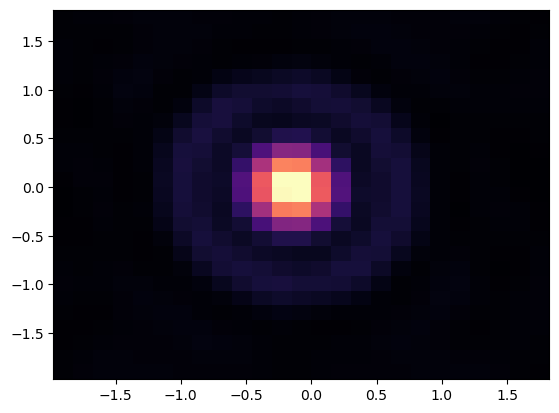

In [17]:
x = frank2d._FT._x*rad_to_arcsec
y = frank2d._FT._y*rad_to_arcsec
y, x = np.meshgrid(y, x)
deg_to_rad = np.pi / 180
plt.pcolormesh(y, x, sol[:, ::-1], cmap =  'magma')

> But the astronomy convention is:
> *  The origin (R.A.,Dec.)=(0,0) of the physical axes is always in the center of the [Nxy/2, Nxy/2] pixel for any value of origin.
> *  The R.A. axis always increases leftwards, following the usual convention of having East to the left and West to the right.
>
>   SO WE NEED INVERT THE DATA IN THE X AXIS!!

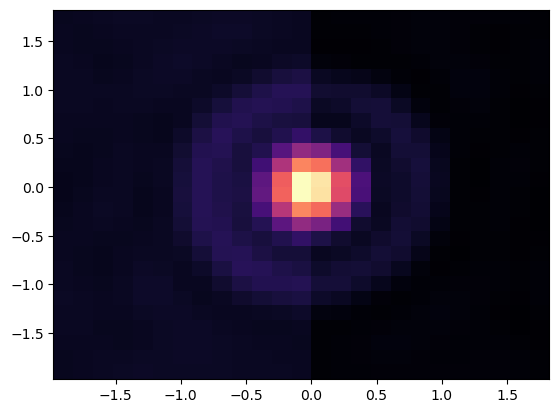

In [18]:
# For being sure of we are doing this correctly, we paint the half of the image a little bit.
sol_ = sol.copy()

sol_[:, :(N//2)+1] += 1e9 
plt.pcolormesh(y, x, sol_, cmap =  'magma')

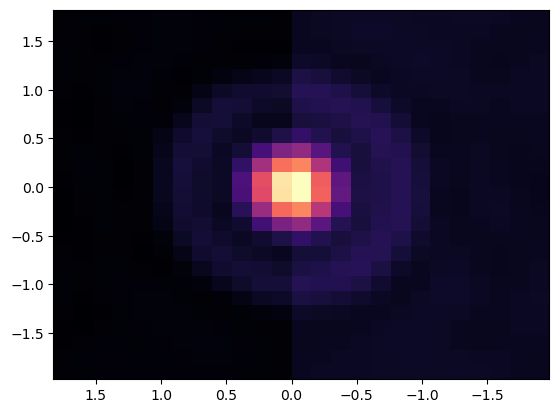

In [19]:
# we invert the DATA in the x axis.
plt.pcolormesh(y, x, sol_, cmap =  'magma')
plt.gca().invert_xaxis()